# DFT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.rc('figure', figsize=(18,6))
#plt.style.use('fivethirtyeight')

### Let's define the following functions:

$$X_k = \sum_{n=0}^{N-1}x_n\cdot e^{-\frac{i2\pi}{N}kn}$$

$$X_k = \sum_{n=0}^{N-1}x_n\cdot [cos(\frac{2 \pi kn}{N}) - i\cdot sin(\frac{2 \pi kn}{N})]$$

In [3]:
def create_cosine_k_N(k, N):
    return np.cos((2*np.pi*k/N)*np.arange(N))
def create_sine_k_N(k, N):
    return np.sin((2*np.pi*k/N)*np.arange(N))

### Consider a 10 sec signal sampled 100 times per sec (overall, we have 1000 samples) at 0.1Hz.

In [4]:
t = 10
sr = 100
N = t*sr

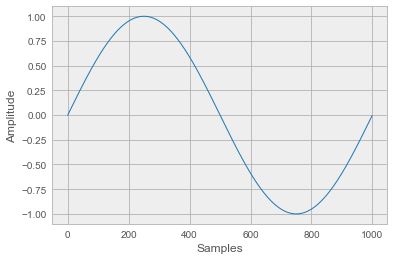

In [5]:
plt.plot(create_sine_k_N(0.1*t, N))
plt.xlabel("Samples")
plt.ylabel("Amplitude");

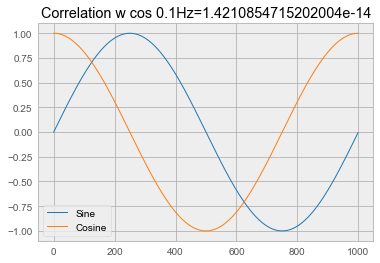

In [6]:
# FIND CORELATIONS
# BAD
signal_1 = create_sine_k_N(0.1*t, N)
signal_2 = create_cosine_k_N(0.1*t, N)
plt.plot(signal_1, label="Sine")
plt.plot(signal_2, label="Cosine")
plt.title("Correlation w cos 0.1Hz={}".format(np.sum(signal_1*signal_2)))
plt.legend()

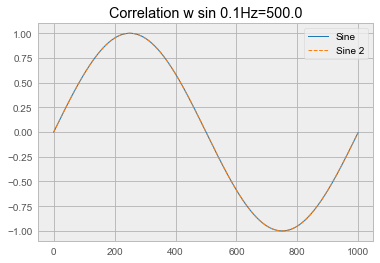

In [7]:
# GOOD
signal_1 = create_sine_k_N(0.1*t, N)
signal_2 = create_sine_k_N(0.1*t, N)
plt.plot(signal_1, label="Sine")
plt.plot(signal_2, label="Sine 2",linestyle='--')
plt.title("Correlation w sin 0.1Hz={}".format(np.sum(signal_1*signal_2)))
plt.legend()

### Now, let's consider a signal composed of 3 different sine waves

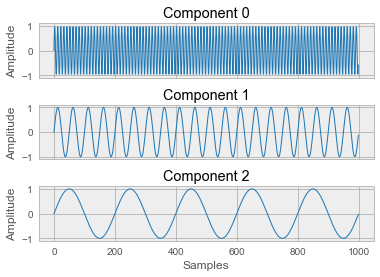

In [8]:
num_components = 3
components = np.zeros((num_components, N))
components[0] = create_sine_k_N(t*10, N)
components[1] = create_sine_k_N(t*2, N)
components[2] = create_sine_k_N(t*0.5, N)

fig, ax  = plt.subplots(nrows=num_components, sharex=True)
for i in range(num_components):
        ax[i].plot(components[i])
        ax[i].set_ylim((-1.1, 1.1))
        ax[i].set_title('Component {}'.format(i))
        ax[i].set_ylabel("Amplitude")
        ax[num_components-1].set_xlabel("Samples")

Text(0,0.5,'Amplitude')

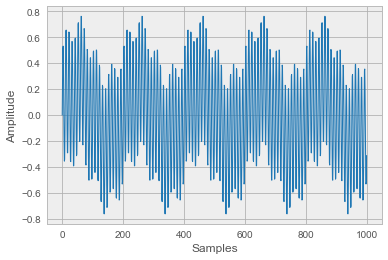

In [9]:
# PLOT SIGNAL
x = 0.5*components[0]+0.1*components[1]+0.2*components[2]
plt.plot(x)
plt.xlabel("Samples")
plt.ylabel("Amplitude")

### Let's compute the correlation with 1Hz sine wave.

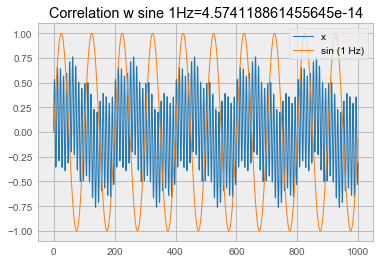

In [10]:
sin_1 = create_sine_k_N(1*t, N)
plt.plot(x, label="x")
plt.plot(sin_1, label="sin (1 Hz)")
plt.title("Correlation w sine 1Hz={}".format(np.sum(sin_1*x)))
plt.legend()

### Let's compute the correlation with 0.5Hz sine wave.

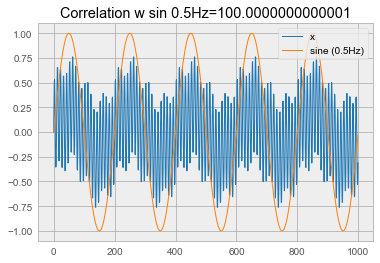

In [11]:
sin_5 = create_sine_k_N(0.5*t, N)
plt.plot(x, label="x")
plt.plot(sin_5, label="sine (0.5Hz)")
plt.title("Correlation w sin 0.5Hz={}".format(np.sum(sin_5*x)))
plt.legend()

### Let's compute the correlation with 2Hz sine wave.

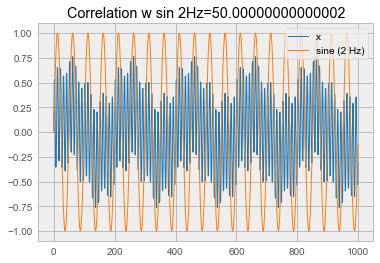

In [12]:
sin_2 = create_sine_k_N(2*t, N)
plt.plot(x, label="x")
plt.plot(sin_2, label="sine (2 Hz)")
plt.title("Correlation w sin 2Hz={}".format(np.sum(sin_2*x)))
plt.legend()

### Let's compute the correlation with 10Hz sine wave.

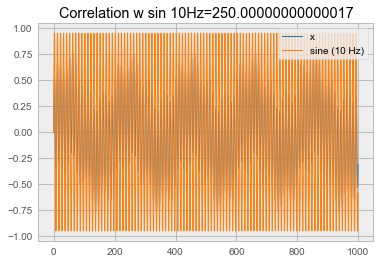

In [13]:
sin_10 = create_sine_k_N(10*t, N)
plt.plot(x, label="x")
plt.plot(sin_10, label="sine (10 Hz)")
plt.title("Correlation w sin 10Hz={}".format(np.sum(sin_10*x)))
plt.legend()

### Let's now compute the DFT.

In [14]:
def DFT(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

Text(0,0.5,'|DFT(K)|')

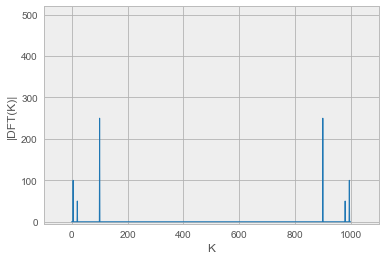

In [15]:
dft = DFT(x)
plt.plot(abs(dft))
plt.xlim((-100, 1100))
plt.ylim((-5, 520))
plt.xlabel("K")
plt.ylabel("|DFT(K)|")

### Let's zoom in!

Text(0,0.5,'|DFT(K)|')

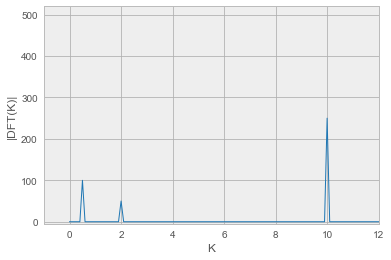

In [17]:
plt.plot(np.arange(0, 500)/10., abs(dft)[:500])
plt.xlim((-1, 12))
plt.ylim((-5, 520))
plt.xlabel("K")
plt.ylabel("|DFT(K)|")